# Bank Customer Churn Prediction & Analysis 🏦

## Milestone 1: Data Collection, Exploration, and Preprocessing 

In [16]:
import pandas as pd

# Load the dataset
bank_customer_churn = pd.read_csv('../data/Bank Customer Churn Prediction.csv')

# Basic information
info = bank_customer_churn.info()
sample_data = bank_customer_churn.head()
shape = bank_customer_churn.shape

info, sample_data, shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


(None,
    customer_id  credit_score country  gender  age  tenure    balance  \
 0     15634602           619  France  Female   42       2       0.00   
 1     15647311           608   Spain  Female   41       1   83807.86   
 2     15619304           502  France  Female   42       8  159660.80   
 3     15701354           699  France  Female   39       1       0.00   
 4     15737888           850   Spain  Female   43       2  125510.82   
 
    products_number  credit_card  active_member  estimated_salary  churn  
 0                1            1              1         101348.88      1  
 1                1            0              1         112542.58      0  
 2                3            1              0         113931.57      1  
 3                2            0              0          93826.63      0  
 4                1            1              1          79084.10      0  ,
 (10000, 12))

### Initial Dataset Overview

- **Total Rows:** 10,000  
- **Total Columns:** 12  

### Feature Types:
- **Categorical:**  
  - `country`, `gender`

- **Numerical:**  
  - `credit_score`, `age`, `tenure`, `balance`,`products_number`, `estimated_salary`

- **Binary indicators:**
  - `credit_card`, `active_member`, `churn` (Target Variable)

- **ID Column:**  
  - `customer_id` *(likely unnecessary for modeling)*

### Potential Key Features:
  - **Financial Factors:** `credit_score`, `balance`, `estimated_salary`
  - **Behavioral Factors:** `tenure`, `products_number`, `credit_card` usage, `active_member` status
  - **Demographics:** `age`, `gender`, `country`

### Target Variable:
- **`churn` (Binary Classification)** (`1` = Churned, `0` = Retained)


In [17]:
# Check for missing values
missing_values = bank_customer_churn.isnull().sum()

# Check for duplicate rows
duplicate_rows = bank_customer_churn.duplicated().sum()

missing_values, duplicate_rows

(customer_id         0
 credit_score        0
 country             0
 gender              0
 age                 0
 tenure              0
 balance             0
 products_number     0
 credit_card         0
 active_member       0
 estimated_salary    0
 churn               0
 dtype: int64,
 np.int64(0))

### Data Quality Check

✅ No missing values in the dataset.  
✅ No duplicate rows found.  

In [ ]:
# Summary statistics for numerical columns, Without (Binary Variables)

continuous_description = bank_customer_churn[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']].describe()
continuous_description
bank_customer_churn.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### 0️⃣1️⃣ Binary Variables ..

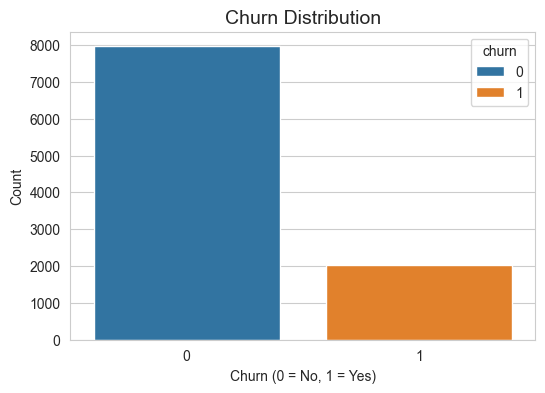

np.float64(20.369999999999997)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot the distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(data=bank_customer_churn, x='churn', hue='churn')
plt.title("Churn Distribution", fontsize=14)
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Calculate churn rate
churn_rate = bank_customer_churn["churn"].mean() * 100
churn_rate

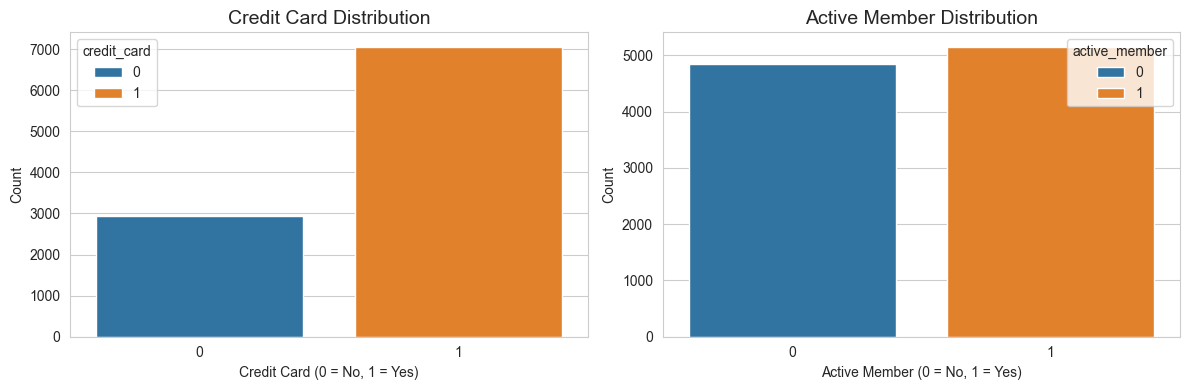

(credit_card
 1    70.55
 0    29.45
 Name: proportion, dtype: float64,
 active_member
 1    51.51
 0    48.49
 Name: proportion, dtype: float64)

In [31]:
# Set plot style
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the distribution of credit_card
sns.countplot(data=bank_customer_churn, x='credit_card', hue='credit_card', ax=axes[0])
axes[0].set_title("Credit Card Distribution", fontsize=14)
axes[0].set_xlabel("Credit Card (0 = No, 1 = Yes)")
axes[0].set_ylabel("Count")

# Plot the distribution of active_member
sns.countplot(data=bank_customer_churn, x='active_member', hue='active_member', ax=axes[1])
axes[1].set_title("Active Member Distribution", fontsize=14)
axes[1].set_xlabel("Active Member (0 = No, 1 = Yes)")
axes[1].set_ylabel("Count")

# Show the plot
plt.tight_layout()
plt.show()

# Calculate distribution percentages for credit_card and active_member
credit_card_counts = bank_customer_churn["credit_card"].value_counts(normalize=True) * 100
active_member_counts = bank_customer_churn["active_member"].value_counts(normalize=True) * 100

credit_card_counts, active_member_counts

### Summary Statistics:
- **Churn rate** is ~20.37%, meaning about 20% of customers leave.  
- **Credit Score** ranges from **350 to 850**, with an average of **650**.  
- **Age** has a wide range (**18 to 92**), with a median of **37**.  
- **Balance** has a median of **97,198**, but a minimum of **0**, which may indicate some inactive accounts.  
- **Products Number** ranges from **1 to 4**, with most customers having just **1 product**.  
- **Binary Variables** 
    - `credit_card`: **70.55%** of customers have a credit card, while **29.45%** do not.
    - `active_member`: **51.51%** of customers are active members, while **48.49%** are not.

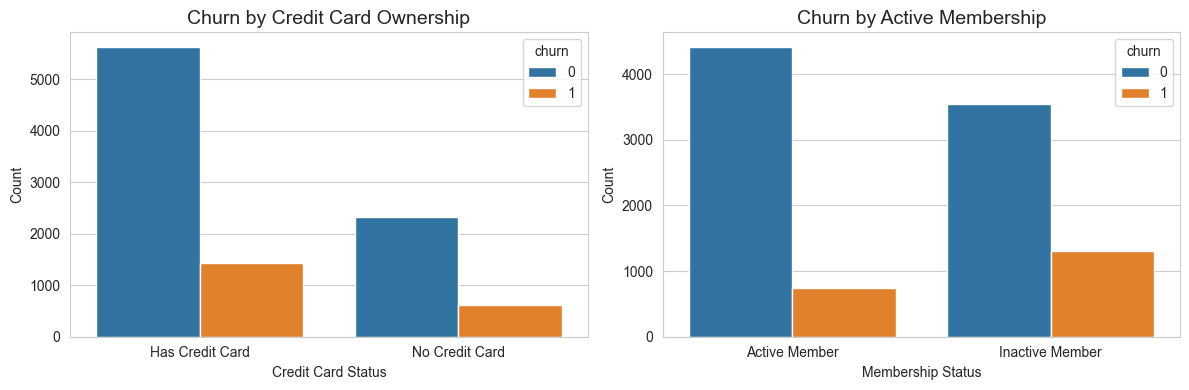

(credit_card
 0    20.814941
 1    20.184266
 Name: churn, dtype: float64,
 active_member
 0    26.850897
 1    14.269074
 Name: churn, dtype: float64)

In [36]:
# Map values to more intuitive labels
bank_customer_churn["credit_card_label"] = bank_customer_churn["credit_card"].map({0: "No Credit Card", 1: "Has Credit Card"})
bank_customer_churn["active_member_label"] = bank_customer_churn["active_member"].map({0: "Inactive Member", 1: "Active Member"})

# Create subplots for churn distribution based on credit_card and active_member
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot churn distribution for credit_card
sns.countplot(data=bank_customer_churn, x='credit_card_label', hue='churn', ax=axes[0])
axes[0].set_title("Churn by Credit Card Ownership", fontsize=14)
axes[0].set_xlabel("Credit Card Status")
axes[0].set_ylabel("Count")

# Plot churn distribution for active_member
sns.countplot(data=bank_customer_churn, x='active_member_label', hue='churn', ax=axes[1])
axes[1].set_title("Churn by Active Membership", fontsize=14)
axes[1].set_xlabel("Membership Status")
axes[1].set_ylabel("Count")

# Show the plot
plt.tight_layout()
plt.show()

# Calculate churn rates within each category
churn_by_credit_card = bank_customer_churn.groupby("credit_card")["churn"].mean() * 100
churn_by_active_member = bank_customer_churn.groupby("active_member")["churn"].mean() * 100

churn_by_credit_card, churn_by_active_member

### Insights from the Analysis

1. Churn and Credit Card Ownership:
    - Customers **without** a credit card have a **20.81% churn rate**.  
    - Customers **with** a credit card have a **20.18% churn rate**.  
    - The difference is minimal, meaning **having a credit card does not significantly impact churn**.  

2. Churn and Active Membership:
    - **Inactive members** have a **26.85% churn rate**.  
    - **Active members** have a **14.27% churn rate**.  
    - This indicates that **being an active member significantly reduces the likelihood of churn**.  

### Key Takeaways:
✅ **Credit Card ownership does not strongly influence churn**.  
✅ **Active Membership plays a major role in retaining customers**.  


### 🎯 Here is the heatmap showing the correlations between `credit_score`, `age`, `tenure`, `balance`, `products_number`, and `estimated_salary`. 
### Numericals .. 

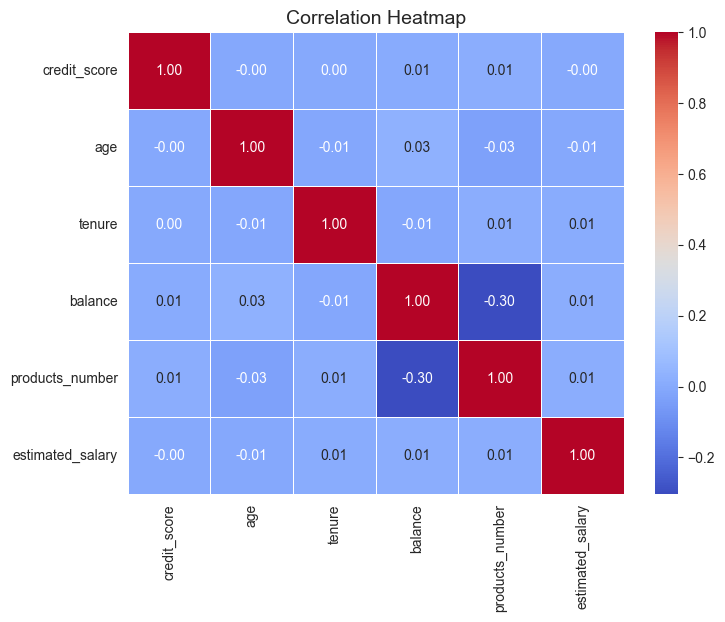

In [37]:
# Select relevant columns for correlation analysis
correlation_columns = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

# Compute the correlation matrix
correlation_matrix = bank_customer_churn[correlation_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


### Key Observations:

- **No strong correlations** between the variables (all values are relatively low).
- **Tenure and age** have a slight positive correlation, which makes sense since older customers tend to have longer tenure.

- **Balance and estimated salary** show very little correlation, meaning higher salaries do not necessarily lead to higher balances.
- **Credit score** does not show a strong relationship with any of the other variables.

### Categorical Variable ..

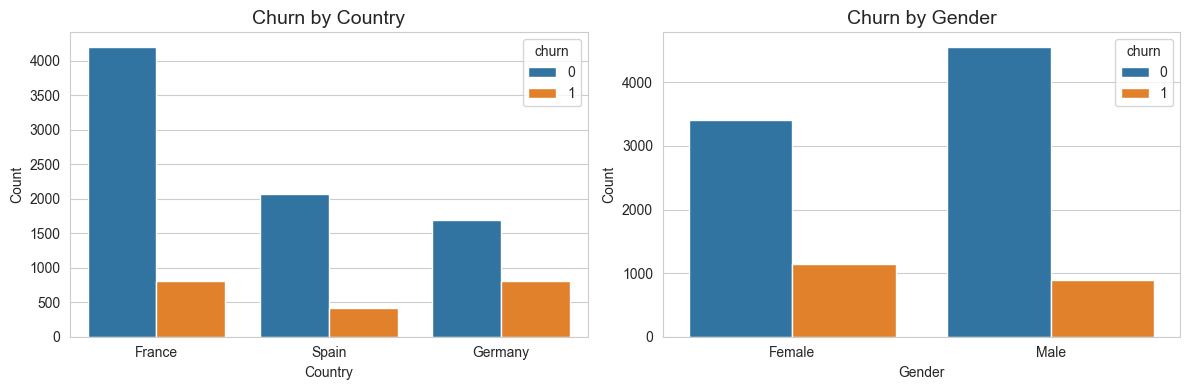

(country
 France     16.154767
 Germany    32.443204
 Spain      16.673395
 Name: churn, dtype: float64,
 gender
 Female    25.071539
 Male      16.455928
 Name: churn, dtype: float64)

In [38]:
# Create subplots for categorical variable distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot churn distribution for country
sns.countplot(data=bank_customer_churn, x='country', hue='churn', ax=axes[0])
axes[0].set_title("Churn by Country", fontsize=14)
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Count")

# Plot churn distribution for gender
sns.countplot(data=bank_customer_churn, x='gender', hue='churn', ax=axes[1])
axes[1].set_title("Churn by Gender", fontsize=14)
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

# Show the plot
plt.tight_layout()
plt.show()

# Calculate churn rates by country and gender
churn_by_country = bank_customer_churn.groupby("country")["churn"].mean() * 100
churn_by_gender = bank_customer_churn.groupby("gender")["churn"].mean() * 100

churn_by_country, churn_by_gender


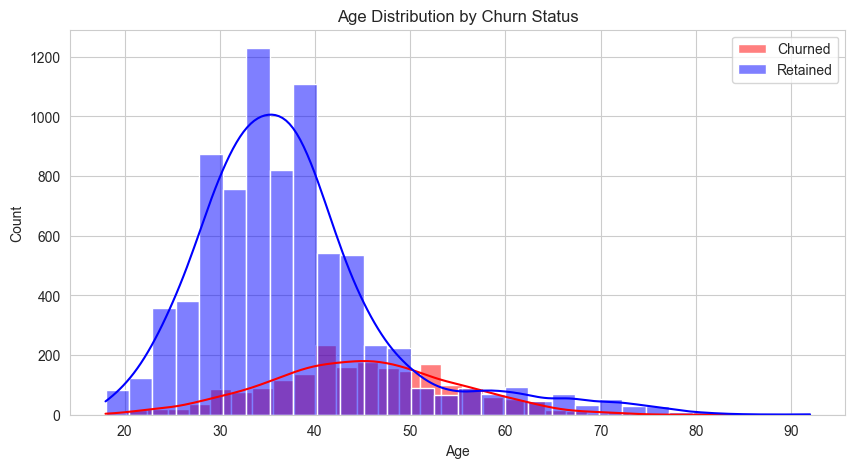

In [40]:
# Analyze churn by age
plt.figure(figsize=(10, 5))
sns.histplot(bank_customer_churn[bank_customer_churn['churn'] == 1]['age'], bins=30, kde=True, color='red', label='Churned')
sns.histplot(bank_customer_churn[bank_customer_churn['churn'] == 0]['age'], bins=30, kde=True, color='blue', label='Retained')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution by Churn Status")
plt.legend()
plt.show()

- **Churn by Country**:
    - **Germany has the highest churn rate (32.44%)**, significantly higher than France (16.15%) and Spain (16.67%).
- **Churn by Gender**:
    - **Female customers have a higher churn rate (25.07%)** compared to males (16.46%).